In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
from path import Path

In [2]:
#load data
file_path = Path("../Resources/categorical_df.csv")
df = pd.read_csv(file_path)
df.head()

,PdId,IncidntNum,Category,Descript,PdDistrict,Month,DayOfWeek,Time_of_Day,Address,ZipCode,Resolution,Categories,Descriptions,PdDistricts,Months,Day,TimeOfDay,Resolutions
0,12005827212120,120058272,WEAPON LAWS,OTHER,SOUTHERN,Jan,Friday,Morning,800 Block of BRYANT ST,94103,"ARREST, BOOKED",16,25,7,4,0,2,0
1,12005827212168,120058272,WEAPON LAWS,OTHER,SOUTHERN,Jan,Friday,Morning,800 Block of BRYANT ST,94103,"ARREST, BOOKED",16,25,7,4,0,2,0
2,14105926363010,141059263,WARRANTS,WARRANT ARREST,BAYVIEW,Apr,Monday,Afternoon,KEITH ST / SHAFTER AV,94124,"ARREST, BOOKED",15,39,0,0,1,0,0
3,16001366271000,160013662,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,Jan,Tuesday,Evening,JONES ST / OFARRELL ST,94108,NONE,6,19,9,4,5,1,1
4,16000274071000,160002740,NON-CRIMINAL,LOST PROPERTY,MISSION,Jan,Friday,Night,16TH ST / MISSION ST,94102,NONE,6,19,3,4,0,3,1


In [3]:
#select the features we want to use from this dataframe 
df = df.drop(columns= "PdId")
df = df.drop(columns= "IncidntNum")
df = df.drop(columns= "PdDistrict")
df = df.drop(columns= "Month")
df = df.drop(columns= "DayOfWeek")
df = df.drop(columns= "Time_of_Day")
df = df.drop(columns= "Address")
df = df.drop(columns= "Resolution")
df = df.drop(columns= "Categories")
df = df.drop(columns= "Descriptions")
df.head()

,Category,Descript,ZipCode,PdDistricts,Months,Day,TimeOfDay,Resolutions
0,WEAPON LAWS,OTHER,94103,7,4,0,2,0
1,WEAPON LAWS,OTHER,94103,7,4,0,2,0
2,WARRANTS,WARRANT ARREST,94124,0,0,1,0,0
3,NON-CRIMINAL,LOST PROPERTY,94108,9,4,5,1,1
4,NON-CRIMINAL,LOST PROPERTY,94102,3,4,0,3,1


In [4]:
df.dtypes

Category       object
Descript       object
ZipCode         int64
PdDistricts     int64
Months          int64
Day             int64
TimeOfDay       int64
Resolutions     int64
dtype: object

We are building a tree based ML model (random forest). OHE(onehotencoder) will be used as our data is not ordinal. 

In [5]:
#encode our categorical data
categorical_vars = df.dtypes[df.dtypes=="object"].index.tolist()

#create OHE instance
enc = OneHotEncoder(sparse=False)

#fit and transform
encoded_df = pd.DataFrame(enc.fit_transform(df[categorical_vars]))

#rename encoded columns
encoded_df.columns = enc.get_feature_names(categorical_vars)
encoded_df.head()

,Category_ASSAULT,Category_BURGLARY,Category_DRUG/NARCOTIC,Category_FRAUD,Category_LARCENY/THEFT,Category_MISSING PERSON,Category_NON-CRIMINAL,Category_OTHER,Category_OTHER OFFENSES,Category_ROBBERY,...,Descript_POSSESSION OF NARCOTICS PARAPHERNALIA,Descript_RESISTING ARREST,Descript_STOLEN AUTOMOBILE,Descript_STOLEN TRUCK,Descript_SUSPICIOUS OCCURRENCE,Descript_THREATS AGAINST LIFE,Descript_TRAFFIC VIOLATION,Descript_TRAFFIC VIOLATION ARREST,Descript_TRESPASSING,Descript_WARRANT ARREST
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#merge dataframes
merged_df = df.merge(encoded_df, right_index=True, left_index=True)
merged_df.head()

,Category,Descript,ZipCode,PdDistricts,Months,Day,TimeOfDay,Resolutions,Category_ASSAULT,Category_BURGLARY,...,Descript_POSSESSION OF NARCOTICS PARAPHERNALIA,Descript_RESISTING ARREST,Descript_STOLEN AUTOMOBILE,Descript_STOLEN TRUCK,Descript_SUSPICIOUS OCCURRENCE,Descript_THREATS AGAINST LIFE,Descript_TRAFFIC VIOLATION,Descript_TRAFFIC VIOLATION ARREST,Descript_TRESPASSING,Descript_WARRANT ARREST
0,WEAPON LAWS,OTHER,94103,7,4,0,2,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,WEAPON LAWS,OTHER,94103,7,4,0,2,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,WARRANTS,WARRANT ARREST,94124,0,0,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,NON-CRIMINAL,LOST PROPERTY,94108,9,4,5,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NON-CRIMINAL,LOST PROPERTY,94102,3,4,0,3,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#drop category and description columns
merged_df = merged_df.drop(columns="Category")
merged_df = merged_df.drop(columns="Descript")
merged_df.head()

,ZipCode,PdDistricts,Months,Day,TimeOfDay,Resolutions,Category_ASSAULT,Category_BURGLARY,Category_DRUG/NARCOTIC,Category_FRAUD,...,Descript_POSSESSION OF NARCOTICS PARAPHERNALIA,Descript_RESISTING ARREST,Descript_STOLEN AUTOMOBILE,Descript_STOLEN TRUCK,Descript_SUSPICIOUS OCCURRENCE,Descript_THREATS AGAINST LIFE,Descript_TRAFFIC VIOLATION,Descript_TRAFFIC VIOLATION ARREST,Descript_TRESPASSING,Descript_WARRANT ARREST
0,94103,7,4,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,94103,7,4,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,94124,0,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,94108,9,4,5,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,94102,3,4,0,3,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
columns = merged_df.columns
columns

Index(['ZipCode', 'PdDistricts', 'Months', 'Day', 'TimeOfDay', 'Resolutions',
       'Category_ASSAULT', 'Category_BURGLARY', 'Category_DRUG/NARCOTIC',
       'Category_FRAUD', 'Category_LARCENY/THEFT', 'Category_MISSING PERSON',
       'Category_NON-CRIMINAL', 'Category_OTHER', 'Category_OTHER OFFENSES',
       'Category_ROBBERY', 'Category_SECONDARY CODES',
       'Category_SUSPICIOUS OCC', 'Category_TRESPASS', 'Category_VANDALISM',
       'Category_VEHICLE THEFT', 'Category_WARRANTS', 'Category_WEAPON LAWS',
       'Descript_AGGRAVATED ASSAULT WITH A DEADLY WEAPON',
       'Descript_AIDED CASE', 'Descript_AIDED CASE, MENTAL DISTURBED',
       'Descript_BATTERY',
       'Descript_BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP',
       'Descript_CREDIT CARD, THEFT BY USE OF', 'Descript_DOMESTIC VIOLENCE',
       'Descript_DRIVERS LICENSE, SUSPENDED OR REVOKED',
       'Descript_ENROUTE TO OUTSIDE JURISDICTION',
       'Descript_FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY',
       'D

In [9]:
#resolutions column does not need to be scaled bc it is our binary classifier. In fact, it does not need to be included in our PCA

#first create a copy of our dataframe 
scaled_features = merged_df.copy()
column_names = ['ZipCode', 'PdDistricts', 'Months', 'Day', 'TimeOfDay',
       'Category_ASSAULT', 'Category_BURGLARY', 'Category_DRUG/NARCOTIC',
       'Category_FRAUD', 'Category_LARCENY/THEFT', 'Category_MISSING PERSON',
       'Category_NON-CRIMINAL', 'Category_OTHER', 'Category_OTHER OFFENSES',
       'Category_ROBBERY', 'Category_SECONDARY CODES',
       'Category_SUSPICIOUS OCC', 'Category_TRESPASS', 'Category_VANDALISM',
       'Category_VEHICLE THEFT', 'Category_WARRANTS', 'Category_WEAPON LAWS',
       'Descript_AGGRAVATED ASSAULT WITH A DEADLY WEAPON',
       'Descript_AIDED CASE', 'Descript_AIDED CASE, MENTAL DISTURBED',
       'Descript_BATTERY',
       'Descript_BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP',
       'Descript_CREDIT CARD, THEFT BY USE OF', 'Descript_DOMESTIC VIOLENCE',
       'Descript_DRIVERS LICENSE, SUSPENDED OR REVOKED',
       'Descript_ENROUTE TO OUTSIDE JURISDICTION',
       'Descript_FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY',
       'Descript_FOUND PERSON', 'Descript_FOUND PROPERTY',
       'Descript_GRAND THEFT FROM A BUILDING',
       'Descript_GRAND THEFT FROM LOCKED AUTO',
       'Descript_GRAND THEFT FROM PERSON',
       'Descript_GRAND THEFT FROM UNLOCKED AUTO',
       'Descript_GRAND THEFT OF PROPERTY',
       'Descript_INFLICT INJURY ON COHABITEE',
       'Descript_INVESTIGATIVE DETENTION', 'Descript_LOST PROPERTY',
       'Descript_LOST/STOLEN LICENSE PLATE',
       'Descript_MALICIOUS MISCHIEF, VANDALISM',
       'Descript_MALICIOUS MISCHIEF, VANDALISM OF VEHICLES',
       'Descript_MISCELLANEOUS INVESTIGATION', 'Descript_MISSING ADULT',
       'Descript_OTHER', 'Descript_PETTY THEFT FROM A BUILDING',
       'Descript_PETTY THEFT FROM LOCKED AUTO',
       'Descript_PETTY THEFT OF PROPERTY', 'Descript_PETTY THEFT SHOPLIFTING',
       'Descript_POSSESSION OF NARCOTICS PARAPHERNALIA',
       'Descript_RESISTING ARREST', 'Descript_STOLEN AUTOMOBILE',
       'Descript_STOLEN TRUCK', 'Descript_SUSPICIOUS OCCURRENCE',
       'Descript_THREATS AGAINST LIFE', 'Descript_TRAFFIC VIOLATION',
       'Descript_TRAFFIC VIOLATION ARREST', 'Descript_TRESPASSING',
       'Descript_WARRANT ARREST']
features = scaled_features[column_names]

In [10]:
#due to the zipcode values being so much bigger than the rest of the values in the dataframe, everything will be scaled using scikit-learn standard scaler 
scaler = StandardScaler()
scaled_data = scaler.fit(features.values)
features = scaler.transform(features.values)
#create df of scaled data
scaled_features[column_names] = features
print(scaled_features)

         ZipCode  PdDistricts    Months       Day  TimeOfDay  Resolutions  \
0      -0.860927     0.950634 -0.443307 -1.465466   0.720326            0   
1      -0.860927     0.950634 -0.443307 -1.465466   0.720326            0   
2       0.909206    -1.566836 -1.598508 -0.970159  -1.132944            0   
3      -0.439467     1.669911 -0.443307  1.011070  -0.206309            1   
4      -0.945219    -0.487921 -0.443307 -1.465466   1.646961            1   
...          ...          ...       ...       ...        ...          ...   
147190  0.403454     0.231357 -1.020908 -1.465466  -0.206309            1   
147191 -0.776635    -1.207198 -1.020908 -1.465466   0.720326            1   
147192 -0.439467    -1.207198 -1.020908  0.515763  -0.206309            1   
147193 -0.439467    -1.207198 -1.020908 -1.465466   0.720326            1   
147194 -0.860927     0.950634 -1.020908 -1.465466  -1.132944            1   

        Category_ASSAULT  Category_BURGLARY  Category_DRUG/NARCOTIC  \
0   

In [11]:
# Saving this scaled dataframe for use in our machine learning algos 
file_path = "../Resources/ml_df.csv"
scaled_features.to_csv(file_path, index=False)

In [12]:
#drop resolutions column now to get dataframe ready for PCA 
scaled_features.head()
scaled_features.drop(columns = "Resolutions")

,ZipCode,PdDistricts,Months,Day,TimeOfDay,Category_ASSAULT,Category_BURGLARY,Category_DRUG/NARCOTIC,Category_FRAUD,Category_LARCENY/THEFT,...,Descript_POSSESSION OF NARCOTICS PARAPHERNALIA,Descript_RESISTING ARREST,Descript_STOLEN AUTOMOBILE,Descript_STOLEN TRUCK,Descript_SUSPICIOUS OCCURRENCE,Descript_THREATS AGAINST LIFE,Descript_TRAFFIC VIOLATION,Descript_TRAFFIC VIOLATION ARREST,Descript_TRESPASSING,Descript_WARRANT ARREST
0,-0.860927,0.950634,-0.443307,-1.465466,0.720326,-0.315846,-0.202024,-0.171087,-0.134147,-0.613840,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
1,-0.860927,0.950634,-0.443307,-1.465466,0.720326,-0.315846,-0.202024,-0.171087,-0.134147,-0.613840,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
2,0.909206,-1.566836,-1.598508,-0.970159,-1.132944,-0.315846,-0.202024,-0.171087,-0.134147,-0.613840,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,6.883863
3,-0.439467,1.669911,-0.443307,1.011070,-0.206309,-0.315846,-0.202024,-0.171087,-0.134147,-0.613840,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
4,-0.945219,-0.487921,-0.443307,-1.465466,1.646961,-0.315846,-0.202024,-0.171087,-0.134147,-0.613840,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147190,0.403454,0.231357,-1.020908,-1.465466,-0.206309,3.166100,-0.202024,-0.171087,-0.134147,-0.613840,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
147191,-0.776635,-1.207198,-1.020908,-1.465466,0.720326,-0.315846,-0.202024,-0.171087,-0.134147,-0.613840,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
147192,-0.439467,-1.207198,-1.020908,0.515763,-0.206309,-0.315846,-0.202024,-0.171087,-0.134147,1.629089,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267
147193,-0.439467,-1.207198,-1.020908,-1.465466,0.720326,-0.315846,-0.202024,-0.171087,-0.134147,1.629089,...,-0.085168,-0.093327,-0.155175,-0.101159,-0.141017,-0.107157,-0.111078,-0.123178,-0.092808,-0.145267


In [13]:
df_cov_matrix = np.cov(scaled_features.T)
df_cov_matrix


array([[ 1.00000679e+00, -2.42182413e-01,  7.50984651e-03, ...,
        -4.66277050e-03, -4.65223481e-03, -2.65663045e-02],
       [-2.42182413e-01,  1.00000679e+00, -6.50692929e-03, ...,
         7.97937823e-03,  1.95516739e-03,  2.56055687e-02],
       [ 7.50984651e-03, -6.50692929e-03,  1.00000679e+00, ...,
         4.20500797e-04,  1.46079149e-03, -9.43971555e-03],
       ...,
       [-4.66277050e-03,  7.97937823e-03,  4.20500797e-04, ...,
         1.00000679e+00, -1.14319738e-02, -1.78939220e-02],
       [-4.65223481e-03,  1.95516739e-03,  1.46079149e-03, ...,
        -1.14319738e-02,  1.00000679e+00, -1.34819948e-02],
       [-2.65663045e-02,  2.56055687e-02, -9.43971555e-03, ...,
        -1.78939220e-02, -1.34819948e-02,  1.00000679e+00]])

In [14]:
#calculate eigenvectors and eigenvalues on covariance matrix
eig_vals, eig_vecs = np.linalg.eig(df_cov_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.46226203e-02  4.65370499e-02 -3.08608652e-02 ... -5.61839045e-03
   9.25842061e-03  3.92245712e-03]
 [ 2.95565894e-02 -4.13968529e-02  2.02805631e-02 ... -1.06428261e-03
  -2.23340706e-03 -9.84587100e-03]
 [ 9.40180578e-03  1.36442850e-02 -1.80212940e-03 ...  2.85277162e-02
  -3.47023632e-02  1.33728952e-02]
 ...
 [-6.75575255e-02 -9.09813571e-02  8.70443477e-03 ... -1.00177878e-01
   1.38900451e-01  1.73948359e-03]
 [-3.35085185e-02 -2.35472973e-02  1.39954919e-02 ...  1.45233997e-04
  -9.07520249e-05  8.93082681e-04]
 [-5.62322553e-02 -1.92985200e-01  3.33424300e-01 ...  3.25206356e-02
  -1.58907439e-02  3.02807878e-02]]
Eigenvalues 
[2.36452417e+00 2.05620278e+00 2.03340965e+00 2.02520913e+00
 2.00419477e+00 1.97045568e+00 1.94366763e+00 1.93917522e+00
 1.86474774e+00 1.84756963e+00 1.81993145e+00 1.73176823e+00
 1.52124875e+00 4.30672770e-01 2.73962083e-01 3.33308605e-02
 2.00386838e-01 1.78344178e-01 1.64513642e-01 1.50949220e-01
 6.12604275e-02 7.44055487e-02 8

In [15]:
#sort eigenvalues in decreasing order. first value is most significant and forms our first principal component
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.3645241658220817
2.0562027805944356
2.0334096509004937
2.0252091274729813
2.0041947656667918
1.970455675133868
1.9436676343477166
1.9391752173334516
1.8647477399002468
1.8475696322943314
1.8199314498053596
1.731768231818215
1.5212487536842572
0.430672770223723
0.27396208313609316
0.03333086053680912
0.20038683841635324
0.17834417848591533
0.16451364157301415
0.15094922036263914
0.06126042750622132
0.07440554872727938
0.0891202584903579
0.117697092461063
0.09611598817786553
0.1048212097735567
0.6145823322091635
0.7497390489751495
1.245656999853893
7.296102803131728e-16
4.354108636522739e-16
0.9257858651223206
1.0827502486239116
0.9658149866063381
1.0614501733484025
0.9800290893265349
1.048781390535876
0.9932188679471031
1.0362019904271857
1.0340154539504613
1.0293957227665567
1.0281097305044113
1.027239794871058
1.0238180824100453
1.0234252468920637
1.020290997996332
1.0188775851893628
1.0180833110716316
1.0170656132585318
1.015156980891978
1.014589064

In [16]:
#selecting the number of principal components
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n", var_exp)
print("Cumulative variance captured as we travel with each component \n", cum_var_exp)

Variance captured by each component is 
 [3.801699914486546, 3.3059784493406013, 3.2693314822844566, 3.256146618427385, 3.2223595678925037, 3.1681136018550724, 3.125043586399947, 3.1178206442004828, 2.9981555806400566, 2.9705364887481602, 2.926099609005653, 2.784350117447356, 2.4458753014196812, 2.0027767862451373, 1.7408540741949603, 1.7066076513738568, 1.6862386861371301, 1.6660134310905728, 1.6624979011345933, 1.6550702622461173, 1.6530026341187776, 1.6516039449995326, 1.6461024897137466, 1.6454708857839986, 1.6404316166020148, 1.638159120754834, 1.636882080795123, 1.6352458185208953, 1.6321771049041787, 1.631264004136987, 1.6298722018559098, 1.6290431680920272, 1.6279094574538835, 1.6265634373917524, 1.6260715273634145, 1.6244308431837364, 1.6236170934845382, 1.6227068761061587, 1.6217503625386023, 1.6212301537418226, 1.6206785268747546, 1.6203646251897619, 1.5969048402718016, 1.5756982140174756, 1.5528446716951083, 1.4884855461160924, 1.205436137881502, 0.988130142028891, 0.692438

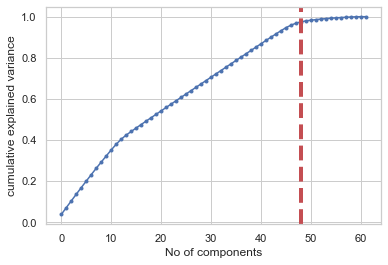

In [17]:
#visualize above on a graph
pca = PCA().fit(scaled_features)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_)[0:62], marker='.')
plt.xlabel('No of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle='--', x=48, ymin=0, ymax=1)
plt.savefig("/Users/bkirton/Desktop/sanFranCrimePredictor/images/PCA_graph.png")
plt.show()


In [18]:
#initialize PCA model
pca = PCA(n_components=50)

crime_pca = pca.fit_transform(scaled_features)

In [19]:
columns = scaled_features.columns
columns

Index(['ZipCode', 'PdDistricts', 'Months', 'Day', 'TimeOfDay', 'Resolutions',
       'Category_ASSAULT', 'Category_BURGLARY', 'Category_DRUG/NARCOTIC',
       'Category_FRAUD', 'Category_LARCENY/THEFT', 'Category_MISSING PERSON',
       'Category_NON-CRIMINAL', 'Category_OTHER', 'Category_OTHER OFFENSES',
       'Category_ROBBERY', 'Category_SECONDARY CODES',
       'Category_SUSPICIOUS OCC', 'Category_TRESPASS', 'Category_VANDALISM',
       'Category_VEHICLE THEFT', 'Category_WARRANTS', 'Category_WEAPON LAWS',
       'Descript_AGGRAVATED ASSAULT WITH A DEADLY WEAPON',
       'Descript_AIDED CASE', 'Descript_AIDED CASE, MENTAL DISTURBED',
       'Descript_BATTERY',
       'Descript_BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP',
       'Descript_CREDIT CARD, THEFT BY USE OF', 'Descript_DOMESTIC VIOLENCE',
       'Descript_DRIVERS LICENSE, SUSPENDED OR REVOKED',
       'Descript_ENROUTE TO OUTSIDE JURISDICTION',
       'Descript_FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY',
       'D

In [20]:
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
pca_df.head(30)

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.038017,0.038017
1,0.071077,0.033060
2,0.103770,0.032693
3,0.136332,0.032561
4,0.168555,0.032224
5,0.200236,0.031681
6,0.231487,0.031250
7,0.262665,0.031178
8,0.292646,0.029982
9,0.322352,0.029705


In [21]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca.components_, columns=columns, index=pca_dims)
pca_test_df.head(50).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9,...,PCA Component 40,PCA Component 41,PCA Component 42,PCA Component 43,PCA Component 44,PCA Component 45,PCA Component 46,PCA Component 47,PCA Component 48,PCA Component 49
ZipCode,-0.034623,0.046537,-0.030861,-0.109518,0.019410,0.067544,-0.015245,0.010353,-0.022176,0.028737,...,0.009739,0.006906,-0.049406,0.161981,0.206313,-0.024068,0.703406,-0.016352,0.012876,0.003343
PdDistricts,0.029557,-0.041397,0.020281,0.113503,-0.029581,-0.059124,0.013527,0.006819,0.021873,-0.006916,...,0.009999,0.003617,0.010507,-0.177527,-0.238860,0.022076,0.689136,0.068003,-0.043112,-0.005661
Months,0.009402,0.013644,-0.001802,-0.012285,-0.003627,-0.004617,0.009657,0.003274,0.010366,0.005902,...,0.023084,0.020733,-0.435150,-0.582234,0.322871,0.117081,-0.003571,0.002018,-0.000028,0.000342
Day,-0.020442,-0.016276,0.021973,0.000274,-0.008004,0.001801,-0.009679,0.008311,0.008145,0.003297,...,0.042622,0.012652,-0.586577,0.361535,-0.415846,-0.177833,-0.043390,0.012129,0.001713,0.003381
TimeOfDay,-0.096490,0.004817,0.005102,-0.020787,-0.031938,-0.033128,0.014799,-0.005956,0.035943,0.005687,...,-0.001010,0.003142,0.026596,-0.143871,0.003086,-0.759919,0.011351,-0.055293,0.007918,-0.000496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Descript_THREATS AGAINST LIFE,-0.040718,-0.021820,-0.000134,-0.033053,-0.026264,-0.003614,0.162077,-0.189702,-0.056414,-0.041334,...,0.014074,0.017769,0.075520,-0.110694,-0.042703,-0.040644,0.013116,0.044668,0.053867,0.026335
Descript_TRAFFIC VIOLATION,-0.060941,-0.078898,0.006316,-0.046007,-0.056699,-0.033018,-0.101819,0.084001,-0.080665,-0.062168,...,-0.033928,-0.032182,0.235852,-0.065877,-0.082026,-0.029725,0.026519,0.070236,0.089271,0.071442
Descript_TRAFFIC VIOLATION ARREST,-0.067558,-0.090981,0.008704,-0.046052,-0.064257,-0.039780,-0.112889,0.093439,-0.088696,-0.070131,...,-0.008866,-0.008607,-0.000776,0.129646,0.100961,-0.050602,-0.011905,0.072676,0.100168,0.078996
Descript_TRESPASSING,-0.033509,-0.023547,0.013995,-0.000613,-0.013859,-0.017302,0.008371,0.000276,0.633228,-0.223504,...,-0.000351,-0.000335,0.007251,0.012235,0.004433,0.026181,0.009411,0.034072,0.040187,0.017867


In [22]:
#create pca dataframe for future use
df = pd.DataFrame(data = crime_pca)
df['Target'] = scaled_features['Resolutions']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Target
0,-1.246750,-0.844068,-0.409222,-0.132834,-0.630385,-0.377883,-0.069611,-0.022982,0.525461,0.509816,...,-0.459491,3.615547,-0.559291,-1.281498,-1.412709,0.253647,1.199879,0.385661,0.028593,0
1,-1.246750,-0.844068,-0.409222,-0.132834,-0.630385,-0.377883,-0.069611,-0.022982,0.525461,0.509816,...,-0.459491,3.615547,-0.559291,-1.281498,-1.412709,0.253647,1.199879,0.385661,0.028593,0
2,-0.895674,-2.624254,4.575264,3.256476,3.297004,1.436539,-0.077342,-0.052912,-0.334082,0.188428,...,-0.054629,1.259550,1.101362,0.978752,0.879054,-0.426530,-0.056600,0.109615,0.016318,0
3,-0.518046,1.870769,-1.905241,3.460478,0.170920,-0.182901,-0.438931,-0.046643,-0.302505,-0.287033,...,0.126208,-0.955255,1.025470,-1.150519,-0.170961,0.938536,0.276246,0.063581,0.027090,1
4,-0.692510,1.985794,-1.978356,3.231742,0.185565,-0.155337,-0.409014,-0.098214,-0.292047,-0.284270,...,0.089400,0.549029,0.164637,0.296134,-1.174351,-0.775759,0.005266,0.160528,0.028320,1


In [23]:
# Saving PCA dataframe
file_path = "../Resources/pca_df.csv"
df.to_csv(file_path, index=False)